In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
import itertools
from sklearn import preprocessing

import time

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Description of the Problem

Kickstarter success rate. 


Training and Testing error. Training time. ROC curve



2. the training and testing error rates you obtained running the various learning algorithms on your problems. At the very least you should include graphs that show performance on both training and test data as a function of training size (note that this implies that you need to design a classification problem that has more than a trivial amount of data) and--for the algorithms that are iterative--training times/iterations. Both of these kinds of graphs are referred to as learning curves, BTW.

3. analyses of your results. Why did you get the results you did? Compare and contrast the different algorithms. What sort of changes might you make to each of those algorithms to improve performance? How fast were they in terms of wall clock time? Iterations? Would cross validation help (and if it would, why didn't you implement it?)? How much performance was due to the problems you chose? How about the values you chose for learning rates, stopping criteria, pruning methods, and so forth (and why doesn't your analysis show results for the different values you chose?)? Which algorithm performed best? How do you define best? Be creative and think of as many questions you can, and as many answers as you can.


-Why did you get the results you did? 

-Compare and contrast the different algorithms. 

-What sort of changes might you make to each of those algorithms to improve performance? 

-How fast were they in terms of wall clock time? Iterations? 

-Would cross validation help (and if it would, why didn't you implement it?)? How much performance was due to the 
problems you chose? 

-How about the values you chose for learning rates, stopping criteria, pruning methods, and so forth (and why doesn't your analysis show results for the different values you chose?)? 

-Which algorithm performed best? How do you define best? Be creative and think of as many questions you can, and as many answers as you can.


In [33]:
df = pd.read_csv('Kickstarter.csv')
df = df.sample(frac=0.01)
df = df.drop(['ID', 'name'], axis=1)
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])
df['duration'] = df['deadline'] - df['launched']
#df['pledged_percentage'] = df['pledged']/df['goal']
actual_conditions = [
    (df['state'] == 'failed'), (df['state'] == 'canceled'), (df['state'] == 'successful')  ]

choices = [-1, 0, 1]
df['Result'] = np.select(actual_conditions, choices, default=0)
#df['usd pledged'] = np.where(df['currency']=='USD', df['pledged'], df['usd pledged'])
df['deadline'] = [x.year for x in df['deadline']]
df['duration'] = (df['duration'] / np.timedelta64(1, 'D')).astype(int)
df = df.drop(['pledged', 'state','country', 'launched', 'usd pledged'], axis=1)

category = preprocessing.LabelEncoder()
category.fit(df['category'])
df['category'] = category.transform(df['category']) 

main_category = preprocessing.LabelEncoder()
main_category.fit(df['main_category'])
df['main_category'] = main_category.transform(df['main_category']) 

currency = preprocessing.LabelEncoder()
currency.fit(df['currency'])
df['currency'] = currency.transform(df['currency']) 

df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0, how='any')

In [34]:
#df = df.sample(frac=0.02)

In [48]:
len(df)

3787

In [4]:
# cancelled_df = df[df['Result']==0].sample(n=1000)
# failed_df = df[df['Result']==-1].sample(n=1000)
# successful_df = df[df['Result']==1].sample(n=1000)

# frames = [cancelled_df, failed_df, successful_df]

# df = pd.concat(frames)

In [36]:
features = list(df.columns[0:-1])
X = df[features]
Y = df['Result']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, shuffle=True)

In [49]:
df

,category,main_category,currency,deadline,goal,backers,duration,Result
105400,98,11,5,2014,1850.0,3,20,-1
338157,56,7,13,2012,5000.0,71,30,-1
273085,26,0,13,2012,800.0,21,13,1
19595,38,6,13,2014,5000.0,38,20,1
4956,50,5,13,2016,10000.0,18,30,0
297792,21,10,4,2016,9000.0,88,31,1
321461,59,13,13,2015,50000.0,1,30,-1
184164,39,7,13,2014,100.0,1,30,-1
113423,139,8,13,2010,800.0,0,45,-1
74683,131,6,13,2016,5000.0,6,36,-1


# 1. Decision Tree

In [37]:
start = time.time()

tuned_parameters = [{'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10, 20],
                     'min_samples_leaf': [1, 2, 5, 10]}]

DT = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=10)
DT.fit(X_train, Y_train)

print(DT.best_params_)

DT_Ypreds = DT.predict(X_test)
DT_Ypreds_training = DT.predict(X_train)

DT_Training_Accuracy = accuracy_score(Y_train, DT_Ypreds_training)
DT_Testing_Accuracy = accuracy_score(Y_test, DT_Ypreds)

print ("Training Accuracy: %0.3f" % DT_Training_Accuracy)
print ("Testing Accuracy: %0.3f" % DT_Testing_Accuracy)

end = time.time()

DT_time = end - start
print ("Time: %0.2f" % DT_time)

{'min_samples_split': 5, 'max_depth': 5, 'min_samples_leaf': 5}
Training Accuracy: 0.830
Testing Accuracy: 0.808
Time: 5.48


Pruning:

min_samples_split : int, float, optional (default=2)
The minimum number of samples required to split an internal node

min_samples_leaf : int, float, optional (default=1)
The minimum number of samples required to be at a leaf node:

# 2. Neural Networks (Multi-layer Perceptron (MLP) )


## Features:
1. hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)

The ith element represents the number of neurons in the ith hidden layer.
hidden_layer_sizes=(10, 2) : 10 hidden layer with 2 hidden units

For a neural network algorithm, activation function, the solver for weight optimization, and learning rate schedule for weight updates are other parameters that weren't considered. 

In [38]:
start = time.time()

tuned_parameters = [{'hidden_layer_sizes':[(1, 5), (1, 10), (2,5), (2,10), (10, 5), (4, 20)]}]

Xtrain_scaled = pd.DataFrame(preprocessing.scale(X_train))
Xtest_scaled = pd.DataFrame(preprocessing.scale(X_test))

NN = GridSearchCV(MLPClassifier(), tuned_parameters, cv = 8)
NN.fit(Xtrain_scaled, Y_train)

print(NN.best_params_)

NN_Ypreds = NN.predict(Xtest_scaled)
NN_Ypreds_training = NN.predict(Xtrain_scaled)

NN_Training_Accuracy = accuracy_score(Y_train, NN_Ypreds_training)
NN_Testing_Accuracy = accuracy_score(Y_test, NN_Ypreds)

print ("Training Accuracy: %0.3f" % NN_Training_Accuracy)
print ("Testing Accuracy: %0.3f" % NN_Testing_Accuracy)

end=time.time()

NN_time = end - start
print ("Time: %0.2f" % NN_time)

{'hidden_layer_sizes': (4, 20)}
Training Accuracy: 0.806
Testing Accuracy: 0.761
Time: 47.60


## Features:

1. n_estimators : integer, optional (default=10)
The number of trees in the forest.

2. criterion : string, optional (default=”gini”)
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

3. max_features : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:

4. max_depth : integer or None, optional (default=None)
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

5. min_samples_split : int, float, optional (default=2)
The minimum number of samples required to split an internal node

6. min_samples_leaf : int, float, optional (default=1)
The minimum number of samples required to be at a leaf node

In [39]:
start = time.time()

tuned_parameters = [{
    'base_estimator':[DecisionTreeClassifier(max_depth=10, min_samples_split=15, min_samples_leaf=5)], 
    'n_estimators':[5, 10], 
    'learning_rate':[1, 0.8, 0.5]
}]

Boost = GridSearchCV(AdaBoostClassifier(), tuned_parameters, cv = 10)
Boost.fit(X_train, Y_train)

print(Boost.best_params_)

Boost_Ypreds = Boost.predict(X_test)
Boost_Ypreds_training = Boost.predict(X_train)

Boost_Training_Accuracy = accuracy_score(Y_train, Boost_Ypreds_training)
Boost_Testing_Accuracy = accuracy_score(Y_test, Boost_Ypreds)

print ("Training Accuracy: %0.3f" % Boost_Training_Accuracy)
print ("Testing Accuracy: %0.3f" % Boost_Testing_Accuracy)

end=time.time()

Boost_time = end - start
print ("Time: %0.2f" % Boost_time)

{'n_estimators': 10, 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=15,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'learning_rate': 0.5}
Training Accuracy: 0.954
Testing Accuracy: 0.761
Time: 3.85


# 4. SVM

-at least 2 kernel functions

Pros: 
* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

Cons:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation

## Features:

1. Kernel(Linear, RBF, poly, sigmoid, precomputed)

Linear kernel = Straight Line (hyperplane) as the decision boundary
* rarely used in practice

Radial Basis Function (RBF) = commonly used kernel in SVC
2 parameters:
* gamma
* C

2. Gamma:
*  'spread' of the kernel and therefore the decision region.
* low gamma -> the 'curve' of the decision boundary is very low and thus the decision region is very broad (underfitting)
* gamma = 10 (The decision boundary starts to be highly effected by individual data points (i.e. variance)).
* high gamma -> the 'curve' of the decision boundary is high, which creates islands of decision-boundaries around data points (overfitting)
* If gamma is ‘auto’ then 1/n_features will be used instead.
* gamma defines how much influence a single training example has. 
* The larger gamma is, the closer other examples must be to be affected.

3. C:
* trades off misclassification of training examples against simplicity of the decision surface
* A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly
* penalty for misclassifying a data point
* small C -> classifier is okay with misclassified data points (high bias, low variance)
* big C -> classifier is heavily penalized for misclassified data and therefore bends over backwards avoid any misclassified data points (low bias, high variance)

C > 10 is too slow

4. degree : int, optional (default=3)
* Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

In [40]:
start = time.time()

tuned_parameters = [{
    'kernel':('rbf', 'sigmoid'), 
    'gamma': [0.001, 0.0001],
    'C':[1, 10, 100, 1000]
}]

SVM = GridSearchCV(SVC(), tuned_parameters)
SVM.fit(X_train, Y_train)

print(SVM.best_params_)

SVM_Ypreds = SVM.predict(X_test)
SVM_Ypreds_training = SVM.predict(X_train)

SVM_Training_Accuracy = accuracy_score(Y_train, SVM_Ypreds_training)
SVM_Testing_Accuracy = accuracy_score(Y_test, SVM_Ypreds)

print ("Training Accuracy: %0.3f" % SVM_Training_Accuracy)
print ("Testing Accuracy: %0.3f" % SVM_Testing_Accuracy)

end=time.time()

SVM_time = end - start
print ("Time: %0.2f" % SVM_time)

{'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
Training Accuracy: 0.881
Testing Accuracy: 0.741
Time: 6.15


# 5. KNN

In [41]:
start = time.time()

tuned_parameters = [{
    'weights':('uniform', 'distance'), 
    'n_neighbors': [2, 3, 5, 10, 20],
    'leaf_size': [20, 30]
}]

KNN = GridSearchCV(KNeighborsClassifier(), tuned_parameters)
KNN.fit(X_train, Y_train)

print(KNN.best_params_)

KNN_Ypreds = KNN.predict(X_test)
KNN_Ypreds_training = KNN.predict(X_train)

KNN_Training_Accuracy = accuracy_score(Y_train, KNN_Ypreds_training)
KNN_Testing_Accuracy = accuracy_score(Y_test, KNN_Ypreds)

print ("Training Accuracy: %0.3f" % KNN_Training_Accuracy)
print ("Testing Accuracy: %0.3f" % KNN_Testing_Accuracy)

end=time.time()

KNN_time = end - start
print ("Time: %0.2f" % KNN_time)

{'n_neighbors': 10, 'weights': 'distance', 'leaf_size': 20}
Training Accuracy: 1.000
Testing Accuracy: 0.742
Time: 0.80


## Features:

1. weights : str or callable, optional (default = ‘uniform’)
weight function used in prediction. Possible values:


* uniform : uniform weights. All points in each neighborhood are weighted equally.

* distance : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

## II. Model Comparison

## 1. ROC Curves

In [42]:
times = [DT_time, NN_time, Boost_time, SVM_time, KNN_time]
Training_Accuracy = [DT_Training_Accuracy, NN_Training_Accuracy, Boost_Training_Accuracy, SVM_Training_Accuracy, KNN_Training_Accuracy]
Testing_Accuracy = [DT_Testing_Accuracy, NN_Testing_Accuracy, Boost_Testing_Accuracy, SVM_Testing_Accuracy, KNN_Testing_Accuracy]

result = pd.DataFrame([times, Training_Accuracy, Testing_Accuracy], columns=["Decision Tree", "Neural Network", "AdaBoost", "SVM", "KNN"], index=['Running Time (seconds)', 'Traing Accuracy', 'Testing Accuracy'])


In [43]:
result

,Decision Tree,Neural Network,AdaBoost,SVM,KNN
Running Time (seconds),5.484111,47.601541,3.848657,6.153799,0.803613
Traing Accuracy,0.829720,0.805676,0.954277,0.880568,0.999606
Testing Accuracy,0.808000,0.760800,0.760800,0.740800,0.742400


In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[620   1  44]
 [132   2  14]
 [ 49   0 388]]
Normalized confusion matrix
[[ 0.93  0.    0.07]
 [ 0.89  0.01  0.09]
 [ 0.11  0.    0.89]]
Confusion matrix, without normalization
[[634   3  28]
 [140   0   8]
 [120   0 317]]
Normalized confusion matrix
[[ 0.95  0.    0.04]
 [ 0.95  0.    0.05]
 [ 0.27  0.    0.73]]
Confusion matrix, without normalization
[[550  59  56]
 [116  17  15]
 [ 49   4 384]]
Normalized confusion matrix
[[ 0.83  0.09  0.08]
 [ 0.78  0.11  0.1 ]
 [ 0.11  0.01  0.88]]
Confusion matrix, without normalization
[[588  23  54]
 [130   6  12]
 [ 99   6 332]]
Normalized confusion matrix
[[ 0.88  0.03  0.08]
 [ 0.88  0.04  0.08]
 [ 0.23  0.01  0.76]]
Confusion matrix, without normalization
[[597  19  49]
 [131   4  13]
 [103   7 327]]
Normalized confusion matrix
[[ 0.9   0.03  0.07]
 [ 0.89  0.03  0.09]
 [ 0.24  0.02  0.75]]


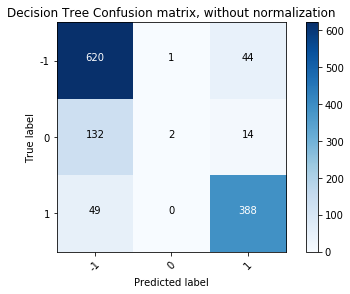

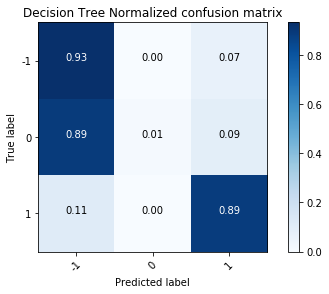

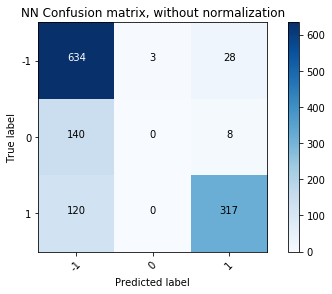

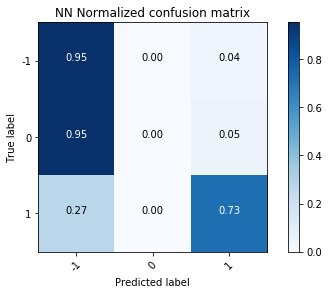

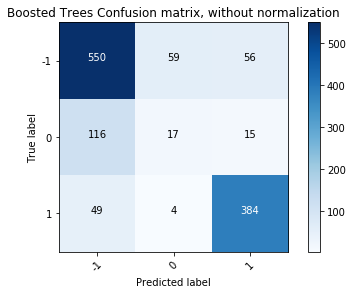

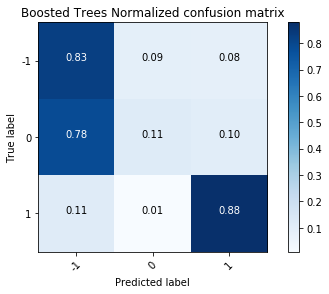

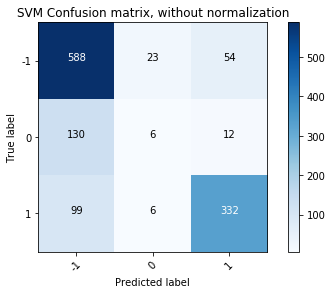

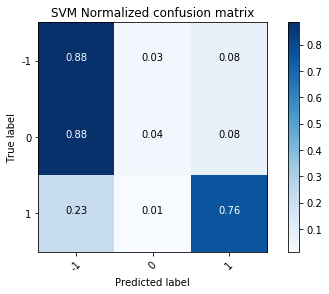

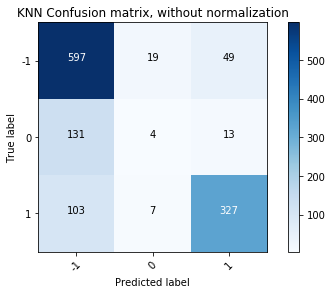

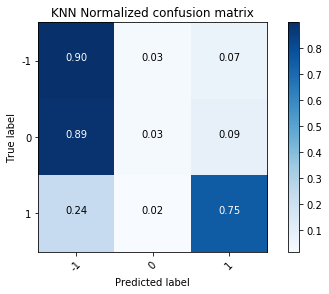

In [45]:
class_names = [-1, 0, 1]

DT_cnf_matrix = confusion_matrix(Y_test, DT_Ypreds)
np.set_printoptions(precision=2)

####################################################################

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(DT_cnf_matrix, classes=class_names,
                      title='Decision Tree Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(DT_cnf_matrix, classes=class_names, normalize=True,
                      title='Decision Tree Normalized confusion matrix')
####################################################################

NN_cnf_matrix = confusion_matrix(Y_test, NN_Ypreds)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(NN_cnf_matrix, classes=class_names,
                      title='NN Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(NN_cnf_matrix, classes=class_names, normalize=True,
                      title='NN Normalized confusion matrix')
####################################################################

Boost_cnf_matrix = confusion_matrix(Y_test, Boost_Ypreds)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(Boost_cnf_matrix, classes=class_names,
                      title='Boosted Trees Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(Boost_cnf_matrix, classes=class_names, normalize=True,
                      title='Boosted Trees Normalized confusion matrix')
####################################################################

SVM_cnf_matrix = confusion_matrix(Y_test, SVM_Ypreds)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(SVM_cnf_matrix, classes=class_names,
                      title='SVM Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(SVM_cnf_matrix, classes=class_names, normalize=True,
                      title='SVM Normalized confusion matrix')
####################################################################
KNN_cnf_matrix = confusion_matrix(Y_test, KNN_Ypreds)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(KNN_cnf_matrix, classes=class_names,
                      title='KNN Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(KNN_cnf_matrix, classes=class_names, normalize=True,
                      title='KNN Normalized confusion matrix')

plt.show()

In [46]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

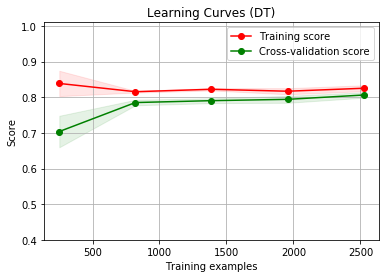

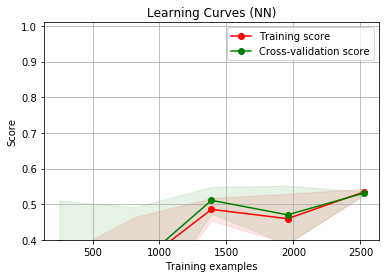

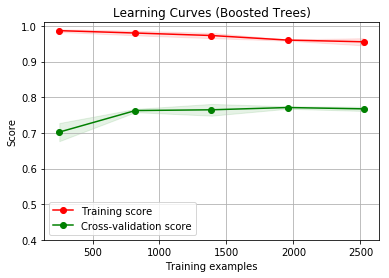

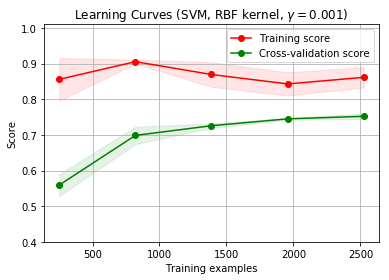

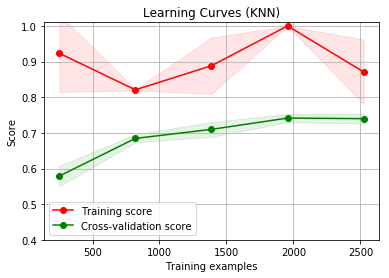

202.554435015


In [47]:
start= time.time()
title = "Learning Curves (DT)"
plot_learning_curve(DT, title, X, Y, ylim=(0.4, 1.01))
####################################################################

title = "Learning Curves (NN)"
plot_learning_curve(NN, title, X, Y, (0.2, 0.7))

####################################################################

title = "Learning Curves (Boosted Trees)"
plot_learning_curve(Boost, title, X, Y, (0.6, 1.1))

####################################################################

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
plot_learning_curve(SVM, title, X, Y, (0.4, 1.01))
####################################################################

title = "Learning Curves (KNN)"
plot_learning_curve(KNN, title, X, Y, (0.4, 1.1))
####################################################################

plt.show()

end= time.time()
print end-start